# Data preparation

* From **business understanding**, we know the task to be solved.  
* Then we do **data understanding** to look into data.
* Now we are going to do some necessary or useful data transformation to reach the aim.

## Outline
0. Summary of data understanding
1. Missing and invalid data
2. Feature extraction
3. Making different statistical units
4. Data transformation

## Data and tasks
* Titanic2 (*titanic_train.csv*) - data preparation for an analysis of ticket fares
* Home Credit (*application_train.csv*) - segmentation of clients by family situation

In [37]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks", color_codes=True)

## Part I. Titanic and ticket fares
### Summary of data understanding
Just few facts from the exploration -- for the aim of this practice.

Let's consider these columns only: *pclass*, *sex*, *age*, *ticket*, *fare*, *cabin*, *embarked*

In [38]:
# data reading
df1 = pd.read_csv('titanic_train.csv')
df1 = df1[['passenger_id', 'ticket', 'pclass', 'fare', 'sex', 'age', 'cabin', 'embarked']]
df1

,passenger_id,ticket,pclass,fare,sex,age,cabin,embarked
0,1216,335432,3,7.7333,female,NaN,NaN,Q
1,699,315089,3,8.6625,male,38.0,NaN,S
2,1267,345773,3,24.1500,female,30.0,NaN,S
3,449,29105,2,23.0000,female,54.0,NaN,S
4,576,28221,2,13.0000,male,40.0,NaN,S
...,...,...,...,...,...,...,...,...
845,158,680,1,50.0000,male,55.0,C39,S
846,174,11771,1,29.7000,male,58.0,B37,C
847,467,244367,2,26.0000,female,24.0,NaN,S
848,1112,SOTON/O.Q. 3101315,3,13.7750,female,3.0,NaN,S


In [39]:
# share of missing data (NaN, NULL) by columns
print(1 - df1.count()/len(df1))

passenger_id    0.000000
ticket          0.000000
pclass          0.000000
fare            0.001176
sex             0.000000
age             0.204706
cabin           0.775294
embarked        0.001176
dtype: float64


* *ticket*, *pclass* and *sex* are complete
* *fare* and *embarked* have negligible counts of missing data
* *age* and *cabin* have significant counts of missing data

In [40]:
# invalid values in data?
# frequency tables of categorical columns
print(df1['pclass'].value_counts())
print(df1['sex'].value_counts())
print(df1['embarked'].value_counts())
# the most often values in string columns
print(df1['ticket'].value_counts().sort_values(ascending=False)[:5])
print(df1['cabin'].value_counts().sort_values(ascending=False)[:5])

3    478
1    206
2    166
Name: pclass, dtype: int64
male      551
female    299
Name: sex, dtype: int64
S    589
C    176
Q     84
Name: embarked, dtype: int64
CA. 2343        10
1601             8
S.O.C. 14879     6
CA 2144          6
PC 17608         6
Name: ticket, dtype: int64
G6                 4
D                  4
B96 B98            4
C22 C26            4
B57 B59 B63 B66    4
Name: cabin, dtype: int64


> String columns (*ticket*, *cabin*) have expected frequencies -- no value has too high frequency.  
> Categorical columns seem to have valid values.

Let's look into numeric columns (*age*, *fare*).

Fare: minimum= 0.0 ; maximum= 512.3292 ; median= 14.1083


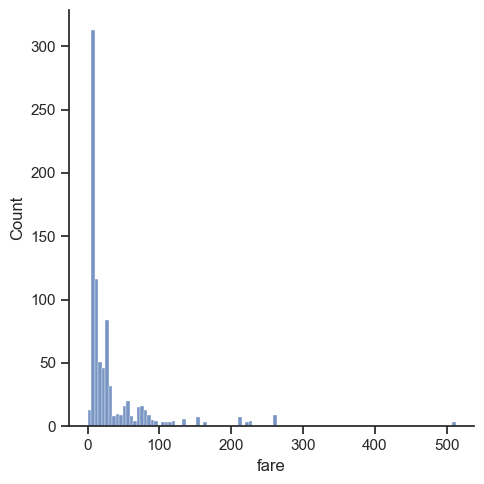

In [41]:
# distribution of values in numeric columns
sns.displot(df1['fare'])
print('Fare: minimum=', df1['fare'].min(), '; maximum=', df1['fare'].max(), '; median=', df1['fare'].median())

In [42]:
# zero fare is rather unexpected; how many passenger have zero fare?
print('Passengers with zero fare: ', (df1['fare']==0).sum())
print('The most often fares: ')
print(df1['fare'].value_counts().sort_values(ascending=False).iloc[0:5])

Passengers with zero fare:  11
The most often fares: 
13.0000    42
8.0500     40
7.7500     39
7.8958     32
26.0000    29
Name: fare, dtype: int64


> Fare values seem to be valid with exception of zero and missing values.

Age: minimum= 0.1667 ; maximum= 80.0 ; median= 28.0
The most often ages:
18.0    32
30.0    30
24.0    29
22.0    28
25.0    26
Name: age, dtype: int64


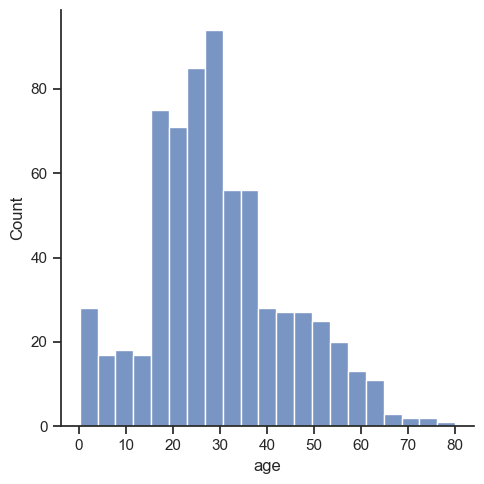

In [43]:
sns.displot(df1['age'])
print('Age: minimum=', df1['age'].min(), '; maximum=', df1['age'].max(), '; median=', df1['age'].median())
print('The most often ages:')
print(df1['age'].value_counts().sort_values(ascending=False).iloc[0:5])

> Age values seem to be fully valid with exception of missing values.

### Dealing with missing and invalid data

Now we use exploration outcomes for the data cleaning.

**TASK 1.**  
Consider how to treat missing or invalid data of fare, embarkment, age and cabin. Then prepare a script for data cleaning.

In [44]:
df1 = df1[df1["fare"].notna() & df1["embarked"].notna()]

### Feature extraction

Multiple persons travelled on one ticket, so they can have the same fare which was paid only once. It's a reason to make new statistical units &ndash; tickets. But is data for the same ticket consistent? Let's check the integrity of data for the tickets.

**TASK 2.**  
Explore whether all passengers with the same ticket have the same fare, pclass, embarkment and cabin.

In [45]:
print(df1.groupby('ticket').agg({'fare': 'nunique'}).value_counts())

fare
1       658
dtype: int64


Now we make a table of tickets by few steps:

1. Base table -- unique rows of *ticket*, *pclass*, *fare* (we now there is integrity).
2. Aggregated features grouped by *ticket* -- e. g. count of passengers; join aggregated table to the base table.
3. Artificial aggregation as a solution of multiple embarkment -- we take the highest value of *embarked* to unify embarkment places for tickets.

**TASK 3.**  
Make a table with tickets as rows and features (some of them aggregated). Choose useful features for future analysis by yourself.

### Data transformation

* The distribution of fare is very skew. Let's transform it by log to get it better balanced.
* The fare is given as a total. But it's better to get an average fare per one passenger.

**TASK 4.**
Add new columns to the table as stated above.

**TASK 5.**
1. Make new columns as meaningful categories "binned" from count of passengers, mean age, count of distinct cabins.
2. Make flags "child" and "baby": flag is True when the youngest passenger for a ticket was under 15, resp. under 3 years.
3. Find the most often combinations of men and women travelling on one ticket (e. g. "single man", "man+woman", "two men", "other" etc.) and make a new column with category description.

## Part II. Home credit
This dataset contains Home Credit clients who got a loan. Each client (=row in the dataset) has plenty of data in columns. We are interested in the segmentation of client portfolio. Segmentation is a division the basic dataset into some well-defined segment, like "young single men", "old widow women living alone" etc.

The relevant columns are *days_birth*, *code_gender*, *cnt_children*, *cnt_fam_members*, *name_family_status*.

**TASK 6.**
Look into data and try to find some big segments based on some features from the set of relevant columns. You may need to do some binning before.

In [46]:
df_hc = pd.read_csv('application_train.csv')
df_hc.columns = df_hc.columns.str.lower()
df_hc = df_hc[['days_birth', 'code_gender', 'cnt_children', 'cnt_fam_members', 'name_family_status']]
df_hc

,days_birth,code_gender,cnt_children,cnt_fam_members,name_family_status
0,-9461,M,0,1.0,Single / not married
1,-16765,F,0,2.0,Married
2,-19046,M,0,1.0,Single / not married
3,-19005,F,0,2.0,Civil marriage
4,-19932,M,0,1.0,Single / not married
...,...,...,...,...,...
307506,-9327,M,0,1.0,Separated
307507,-20775,F,0,1.0,Widow
307508,-14966,F,0,1.0,Separated
307509,-11961,F,0,2.0,Married
